In [1]:
# having a relationship amonst the dependent and independent 
# is import fro us to perform linear regrassion as if there isnt and
# relationship between the two donot use linear regression
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
# xs =[1,2,3,4,5,6]
# ys= [5,4,6,5,7,8]
# plt.scatter (xs,ys)
# plt.show()

In [10]:
def create_dataset(hm, variance, step=2, correlation=False):
    val=1# first val of y
    ys=[]
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val = step
    xs = [i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64), np.array(ys, dtype=np.float64)

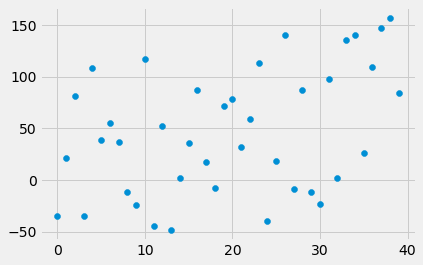

In [11]:
# xs = np.array(xs,dtype=np.float64 )
# ys=np.array(ys,dtype=np.float64)
xs , ys = create_dataset(40,100 ,2 , correlation='pos')
# print (xs,ys)
plt.scatter(xs,ys)
plt.show()

In [12]:
def best_fit_slope(xs,ys):
    m = ((mean(xs)* mean(ys))-mean(xs*ys))/((mean(xs)**2)-mean(xs**2))
    b = (mean(ys)-m*mean(xs)) 
    return m,b 
m,b = best_fit_slope(xs,ys)
print (m,b)
# order of opperation PEMDAS


2.089399624765478 5.731707317073187


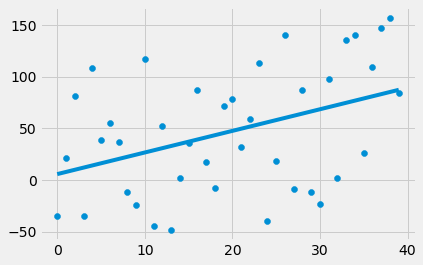

In [13]:
from matplotlib import style
style.use('fivethirtyeight')
# plotting the best fit line 
# for the best fit line we need to identify the best fit line slope and its y intercept for that set of data using the previous means formulae
regression_line = [(m*x)+b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

In [14]:
# how accurate is this best fit line
# R squared theory
# you get a best fit line to any type of data but how 
#good of a  best fit line is it?
# the question we should be asking is is it a good fit?
# error is the distance between the point and the best fit line 
# we square the error because first it removes positive negative cancelation 
# secondly we want to penalise our data for ouliers 
# but then why not e^4 or 6 
# we can use these powers too but its is a standard

def sq_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)
def coeff_of_determinatin(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    sq_error_reg = sq_error(ys_orig,ys_line)
    sq_error_y_mean = sq_error(ys_orig,y_mean_line)
    return 1-(sq_error_reg/sq_error_y_mean)
r_sq = coeff_of_determinatin(ys,regression_line)
print(r_sq)





0.16282909260841716
